# The Sparks Foundation - Data Science & Business Analytics Internship

# TASK 2 - Prediction using UnSupervised Machine Learning

# Steps:

Step 1 - Importing the libraries

Step 2 - Importing the dataset

Step 3 - Using the elbow method to find the optmimal number of clusters

Step 4 - Training the KMeans model on the dataset

# Author: Prabhat wakade

# 1) Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# 2) Importing the dataset

In [20]:
#reading a csv file
Iris=pd.read_csv('Iris.csv')


In [21]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
Iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [26]:
# Dividig this into Independent and dependent features
x=Iris.iloc[:,[1,4]].values
x



array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.1],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

# 3) Using the KMeans elbow method to find the optmimal number of clusters

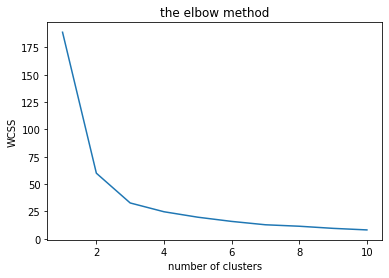

In [27]:
from sklearn.cluster import KMeans
wcss=[] 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

# 4) Training the KMeans model on the dataset

In [28]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [29]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 2 1 0 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


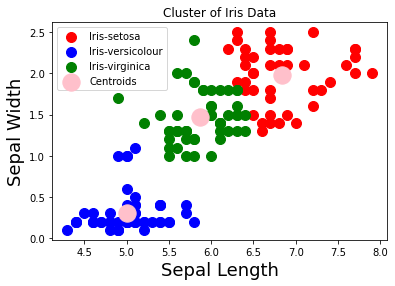

In [30]:
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans==2, 1], s=100,c='green', label ='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink', label ='Centroids')
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length', fontsize =18)
plt.ylabel('Sepal Width', fontsize =18)
plt.legend()
plt.show()


# Thank you :)